# Regression model on the Capital Bike Share data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import calendar
from datetime import date, datetime

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.preprocessing import StandardScaler,MinMaxScaler, KBinsDiscretizer, PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_validate, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
import time
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, SGDRegressor
%matplotlib inline
from IPython import display
from sklearn.pipeline import make_pipeline

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Project Goal 

I. The goal is to build and train a regression model on the Capital Bike Share (Washington, D.C.) data set, in order to predict demand for bicycle rentals of selected features.

## Data description

- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist; 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds; 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals (TARGET)

## First look at the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 n

(None, None)

In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [8]:
# copy of the original data sets
train_1 = train.copy()
test_1 = test.copy()

## Exploration of 'datetime'

In [9]:
train['datetime'] = pd.to_datetime(train["datetime"])

In [10]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['time'] = train['datetime'].dt.time
train['hour'] = train['datetime'].dt.hour
train['dayofweek'] = train['datetime'].dt.dayofweek
train['date'] = train['datetime'].dt.date

In [11]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,time,hour,dayofweek,date
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,00:00:00,0,5,2011-01-01
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,01:00:00,1,5,2011-01-01
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,02:00:00,2,5,2011-01-01
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,03:00:00,3,5,2011-01-01
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,04:00:00,4,5,2011-01-01


In [12]:
#train.set_index('datetime', inplace=True)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rentals amount by working day')]

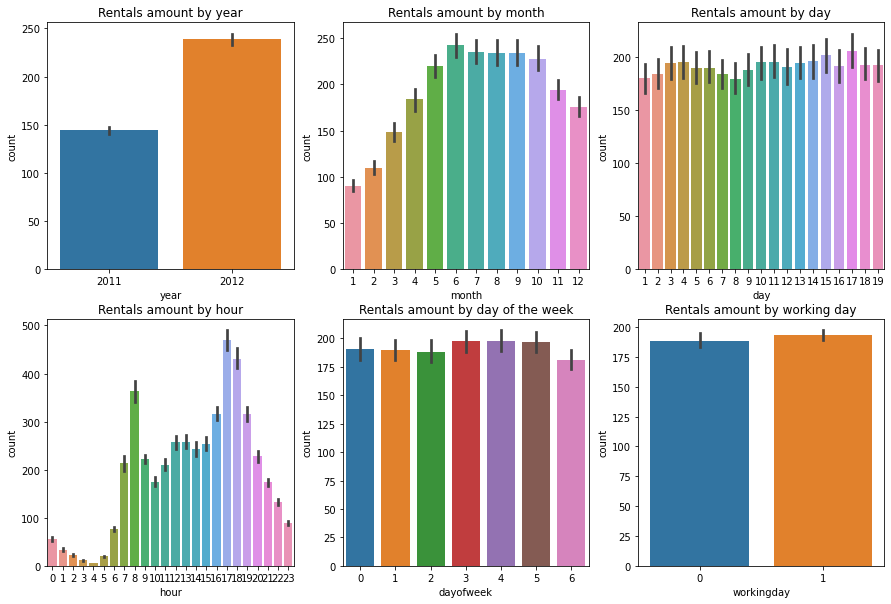

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15, 10)

sns.barplot(data=train, x='year', y='count', ax=axes[0][0])
sns.barplot(data=train, x='month', y='count', ax=axes[0][1])
sns.barplot(data=train, x='day', y='count', ax=axes[0][2])
sns.barplot(data=train, x='hour', y='count', ax=axes[1][0])
sns.barplot(data=train, x='dayofweek', y='count', ax=axes[1][1])
sns.barplot(data=train, x='workingday', y='count', ax=axes[1][2])

axes[0][0].set(ylabel='count', title='Rentals amount by year')
axes[0][1].set(ylabel='count', title='Rentals amount by month')
axes[0][2].set(ylabel='count', title='Rentals amount by day')
axes[1][0].set(ylabel='count', title='Rentals amount by hour')
axes[1][1].set(ylabel='count', title='Rentals amount by day of the week')
axes[1][2].set(ylabel='count', title='Rentals amount by working day')

<AxesSubplot:xlabel='hour', ylabel='count'>

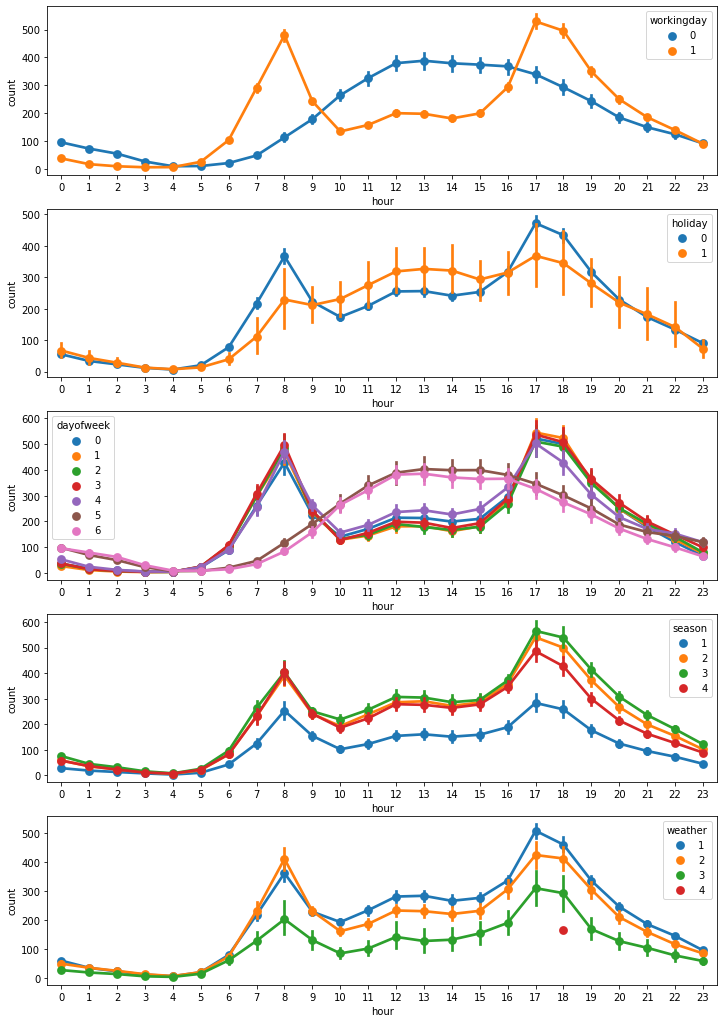

In [14]:
figure, axes = plt.subplots(nrows=5)
figure.set_size_inches(12, 18)

sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='dayofweek', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

## EDA

In [15]:
train['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [16]:
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

[Text(0.5, 1.0, 'Box Plot on count across working Day')]

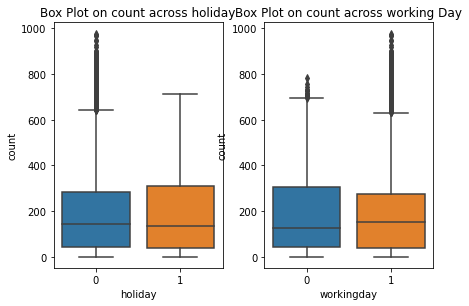

In [17]:
figure, axes = plt.subplots(ncols=2)
plt.tight_layout()

sns.boxplot(x='holiday', y='count', data=train, ax=axes[0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1])

axes[0].set(title='Box Plot on count across holiday')
axes[1].set(title='Box Plot on count across working Day')

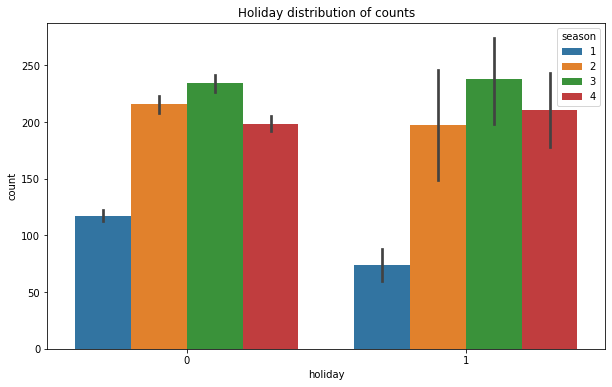

In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
# barplot for 'holiday' distribution of counts
sns.barplot(data=train, x='holiday', y='count', hue='season')
ax.set_title('Holiday distribution of counts')
plt.show()

<AxesSubplot:xlabel='hour', ylabel='count'>

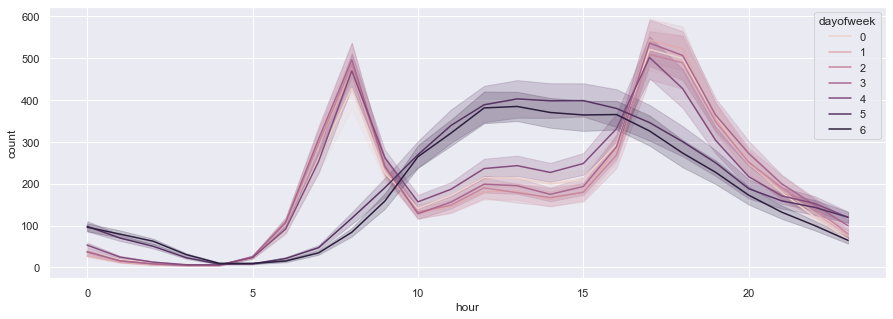

In [19]:
sns.set(rc={'figure.figsize': (15, 5)})
sns.lineplot(data=train, x='hour', y='count', hue=train['dayofweek'])

<AxesSubplot:>

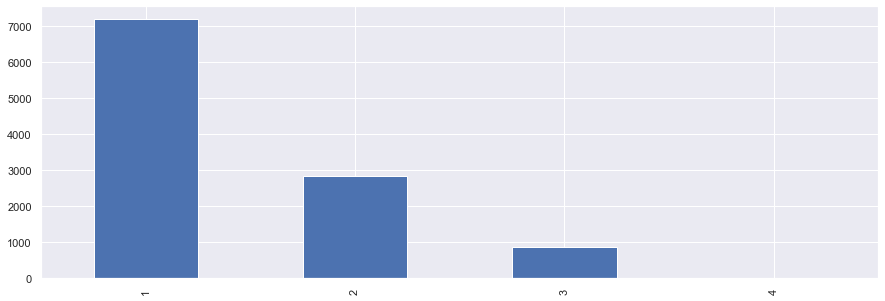

In [20]:
train["weather"].value_counts().plot(kind="bar")

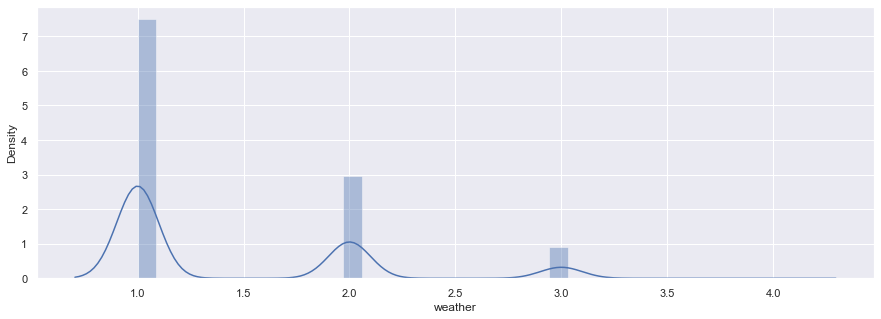

In [21]:
sns.distplot(train["weather"]);

Mean value of temperature is : 20.230859819952173


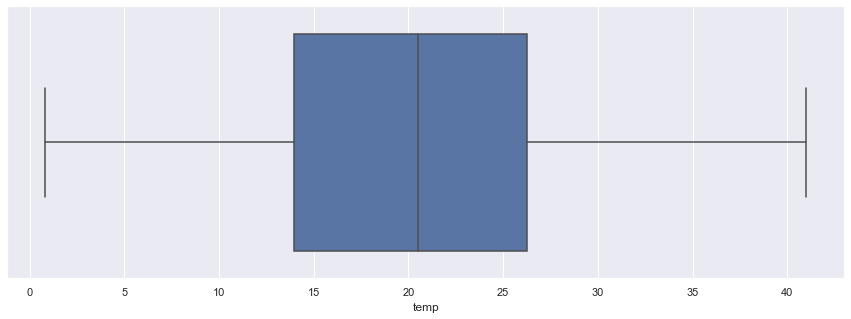

In [22]:
sns.boxplot("temp", data=train)
# checking the mean values
print("Mean value of temperature is :", train.temp.mean())

In [23]:
train.pivot_table(values='temp', index='year', aggfunc=['min', 'mean', 'max'])

,min,mean,max
,temp,temp,temp
year,,,
2011,2.46,19.751988,38.54
2012,0.82,20.706051,41.00


In [24]:
freq_temp_2011 = train[train['year'] == 2011]['temp'].mode()[0]
freq_temp_2011

18.86

In [25]:
freq_temp_2012 = train[train['year'] == 2012]['temp'].mode()[0]
freq_temp_2012

14.76

In [26]:
train.pivot_table(values='humidity',
                  index='year',
                  aggfunc=['min', 'mean', 'max'])

,min,mean,max
,humidity,humidity,humidity
year,,,
2011,0,63.405017,100
2012,16,60.379575,100


In [27]:
freq_humidity = train['humidity'].mode()[0]

<AxesSubplot:xlabel='humidity', ylabel='count'>

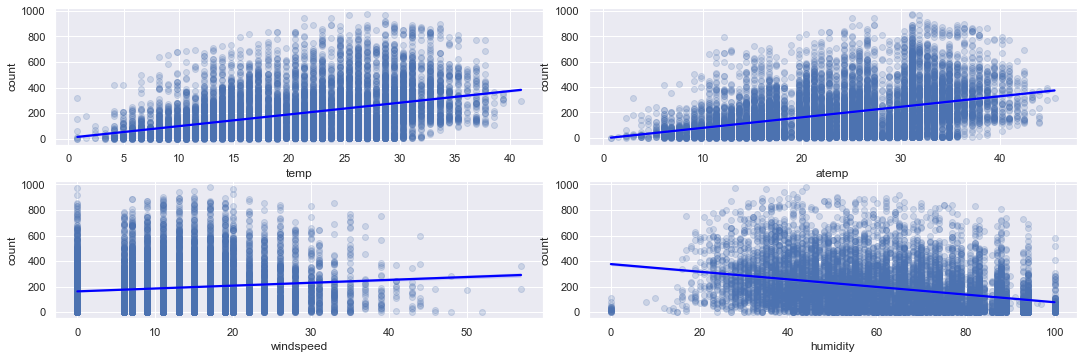

In [28]:
figure, axes = plt.subplots(nrows=2, ncols=2)
plt.tight_layout()

sns.regplot(x='temp',
            y='count',
            data=train,
            ax=axes[0, 0],
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'blue'})
sns.regplot(x='atemp',
            y='count',
            data=train,
            ax=axes[0, 1],
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'blue'})
sns.regplot(x='windspeed',
            y='count',
            data=train,
            ax=axes[1, 0],
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'blue'})
sns.regplot(x='humidity',
            y='count',
            data=train,
            ax=axes[1, 1],
            scatter_kws={'alpha': 0.2},
            line_kws={'color': 'blue'})

[Text(0.5, 1.0, 'Box Plot On Count Across Weather')]

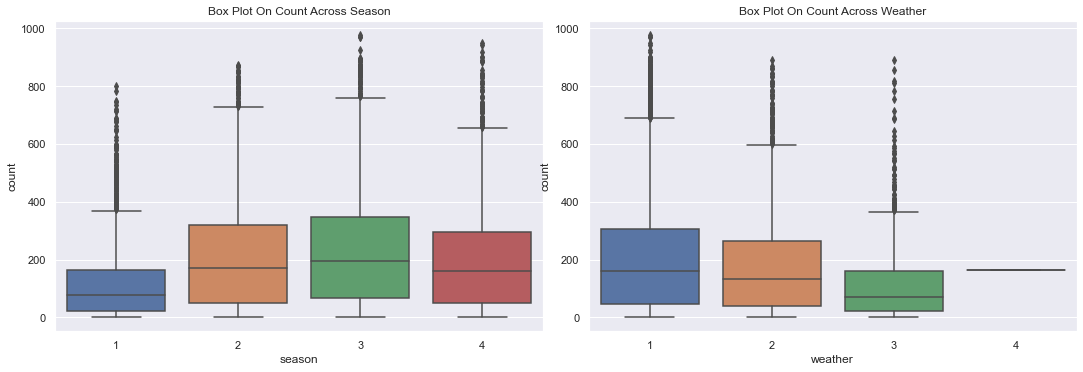

In [29]:
figure, axes = plt.subplots(ncols=2)
plt.tight_layout()

sns.boxplot(x='season', y='count', data=train, ax=axes[0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[1])

axes[0].set(title='Box Plot On Count Across Season')
axes[1].set(title='Box Plot On Count Across Weather')

<AxesSubplot:xlabel='hour', ylabel='count'>

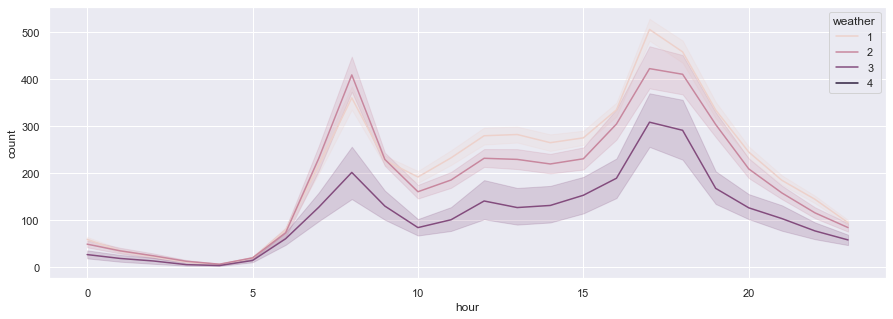

In [30]:
sns.set(rc={'figure.figsize': (15, 5)})
sns.lineplot(data=train, x='hour', y='count', hue=train['weather'])

<AxesSubplot:xlabel='count', ylabel='casual'>

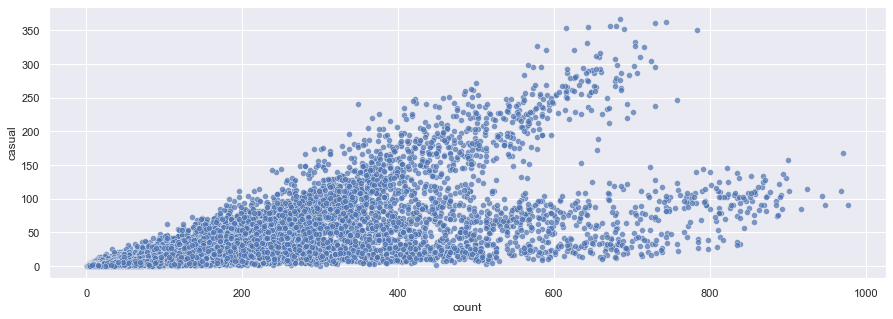

In [31]:
sns.scatterplot(data=train, x='count', y='casual', alpha=0.7)

<AxesSubplot:xlabel='count', ylabel='registered'>

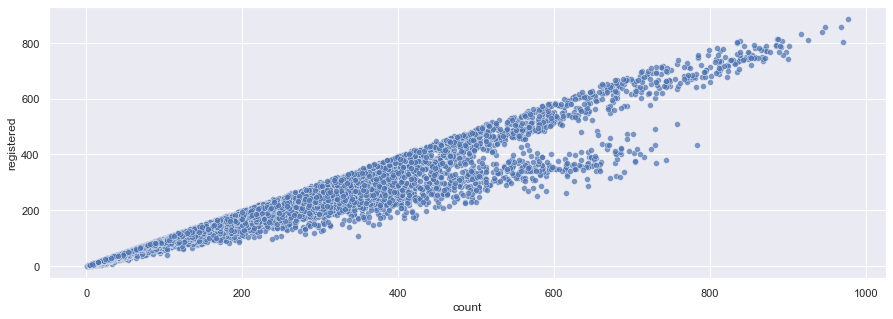

In [32]:
sns.scatterplot(data=train, x='count', y='registered', alpha=0.7)

In [33]:
train.drop(['casual', 'registered', 'time', 'date'], axis=1, inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   count       10886 non-null  int64         
 10  year        10886 non-null  int64         
 11  month       10886 non-null  int64         
 12  day         10886 non-null  int64         
 13  hour        10886 non-null  int64         
 14  dayofweek   10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 1.2 MB


In [35]:
train.nunique()

datetime      10886
season            4
holiday           2
workingday        2
weather           4
temp             49
atemp            60
humidity         89
windspeed        28
count           822
year              2
month            12
day              19
hour             24
dayofweek         7
dtype: int64

In [36]:
bin_cols = [
    'holiday',
    'workingday',
    'year',
]
cat_cols = [
    'season',
    'weather',
    'month',
    'day',
    'hour',
    'dayofweek'
]
num_cols = ['temp', 'atemp', 'humidity', 'windspeed']

Numeric columns

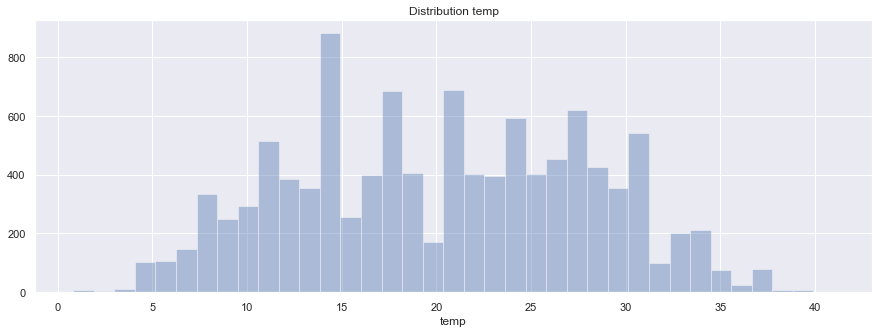

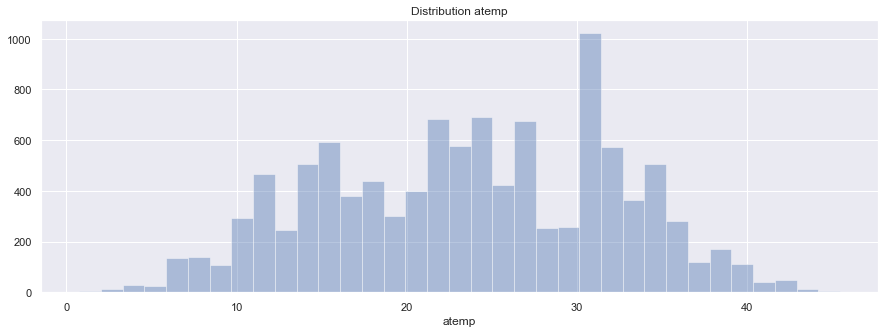

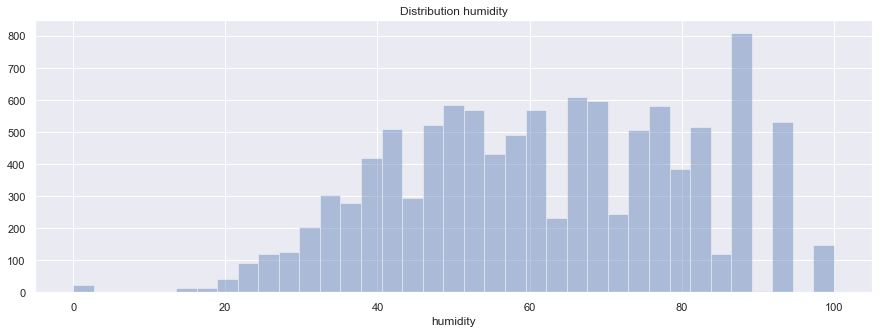

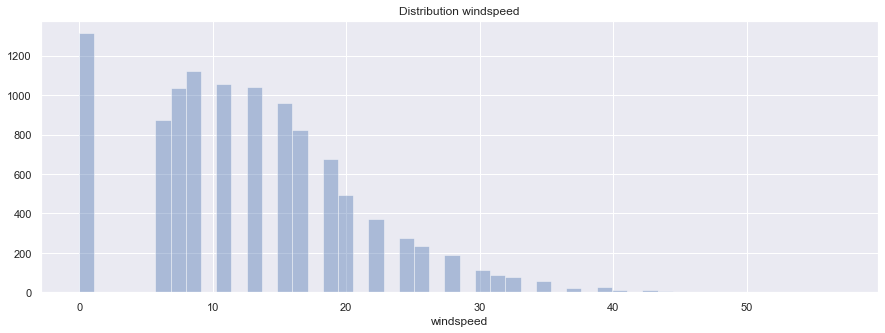

In [37]:
for col in num_cols:
    plt.figure()
    plt.title(f"Distribution {col}")
    sns.distplot(train[col], kde=False)

In [38]:
# attempt to normalize the distribution of num_cols
#cols_log = ['temp', 'atemp','humidity', 'windspeed']
#for i in cols_log:
    #train[i] = np.log(train[i] + 1)
    #plt.figure(figsize=(10,6))
    #sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    #plt.show()

In [39]:
train[num_cols] = train[num_cols].round(2)

<AxesSubplot:>

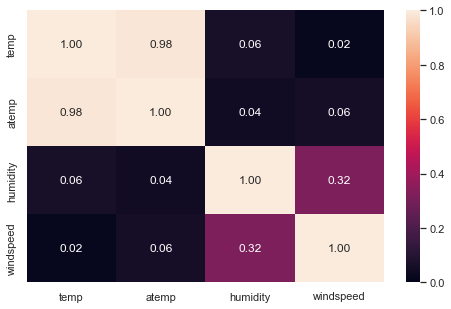

In [40]:
# correlation of features
plt.figure(figsize=(8, 5))
sns.heatmap(train[num_cols].corr().abs(),
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f")

Text(0.5, 1.0, 'Significance of num_cols')

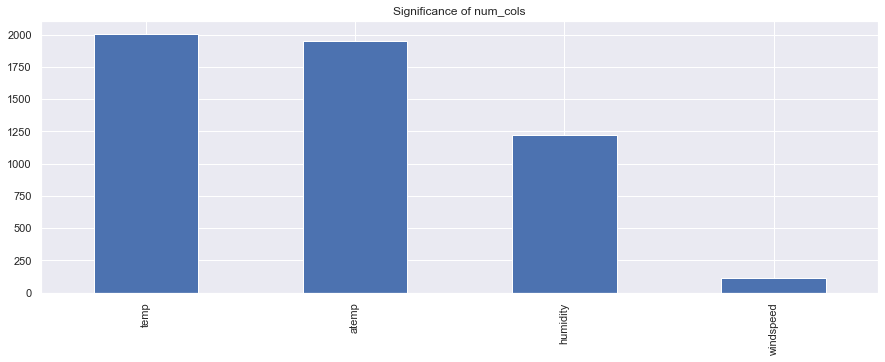

In [41]:
# ANOVA analysis
imp_num = pd.Series(f_regression(train[num_cols], train["count"])[0],
                    index=num_cols)
imp_num.sort_values(inplace=True, ascending=False)
imp_num.plot(kind="bar")
plt.title('Significance of num_cols')

In [42]:
train = train.drop(['atemp'], axis=1)

Categorical columns

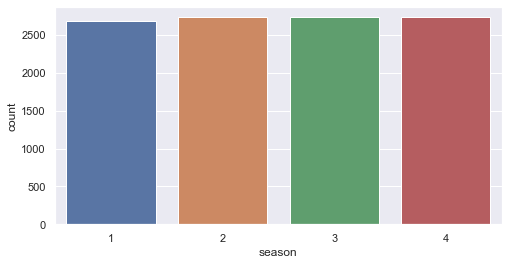

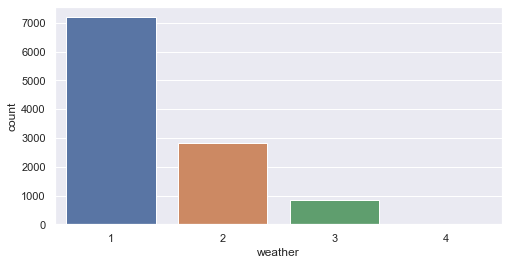

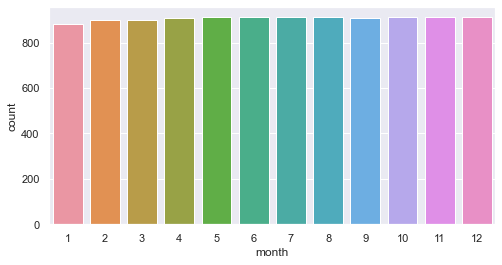

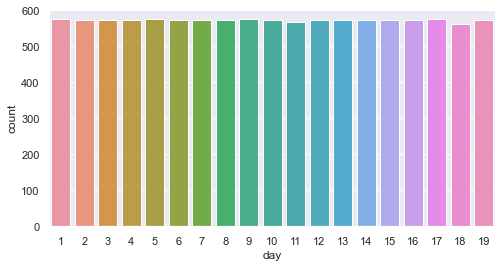

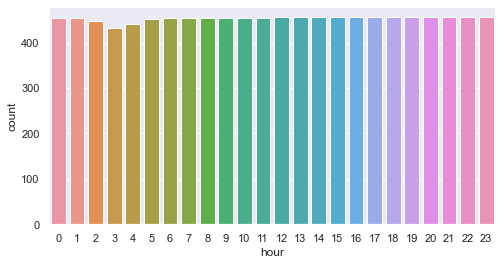

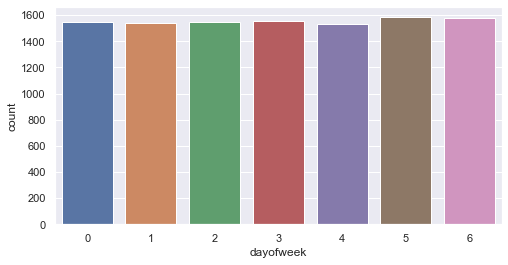

In [43]:
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(train[col])

Text(0.5, 1.0, 'Significance of categorical columns')

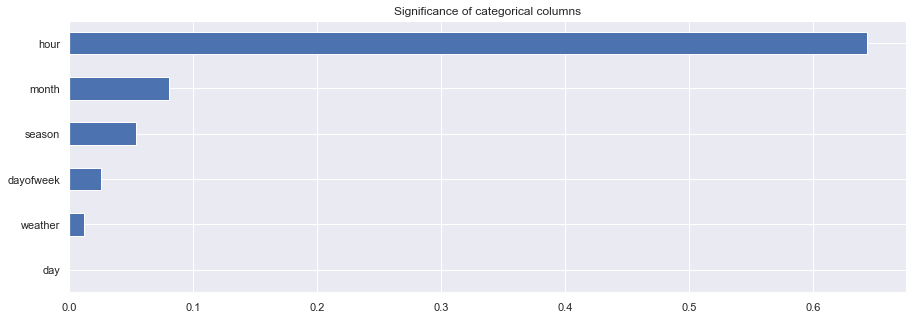

In [44]:
# significance of features
imp_cat = pd.Series(mutual_info_regression(pd.concat([train[cat_cols]],
                                                     axis=1),
                                           train['count'],
                                           discrete_features=True),
                    index=pd.concat([train[cat_cols]], axis=1).columns)
imp_cat.sort_values(inplace=True)
imp_cat.plot(kind='barh')
plt.title('Significance of categorical columns')

<AxesSubplot:>

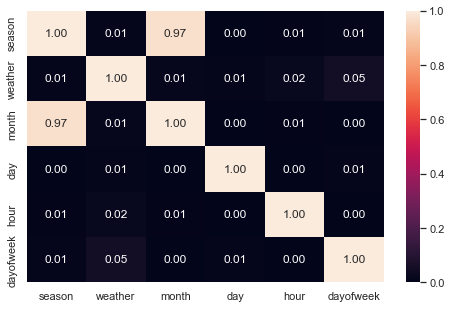

In [45]:
# correlation of features
plt.figure(figsize=(8, 5))
sns.heatmap(train[cat_cols].corr().abs(),
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f")

In [46]:
#train.drop(['weather'], axis=1, inplace=True)

Binary columns

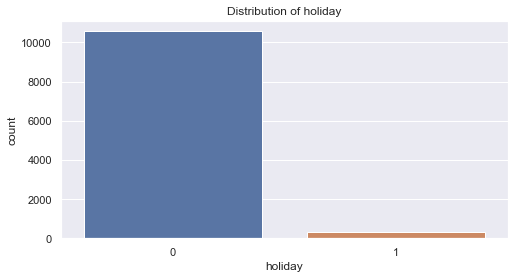

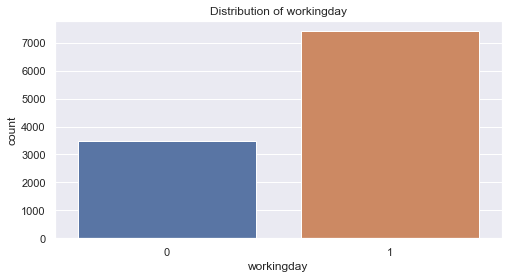

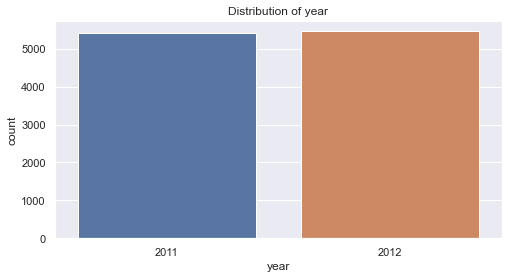

In [47]:
for col in bin_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(train[col])
    plt.title(f"Distribution of {col}")

Text(0.5, 1.0, 'Significance of binary columns')

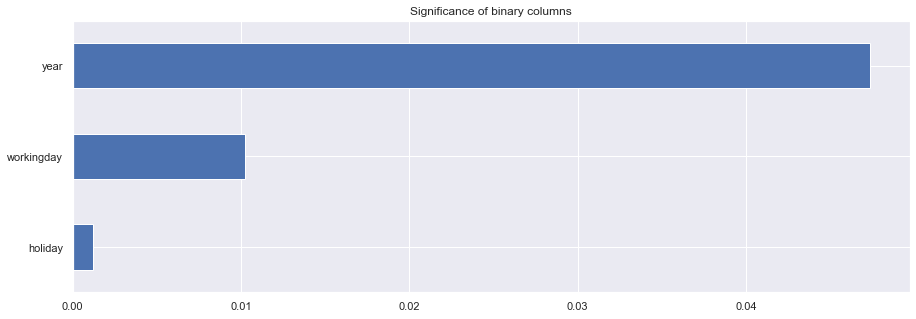

In [48]:
imp_bin = pd.Series(mutual_info_regression(train[bin_cols],
                                           train['count'],
                                           discrete_features=True),index=bin_cols)
imp_bin.sort_values(inplace=True)
imp_bin.plot(kind='barh')
plt.title('Significance of binary columns')

<AxesSubplot:>

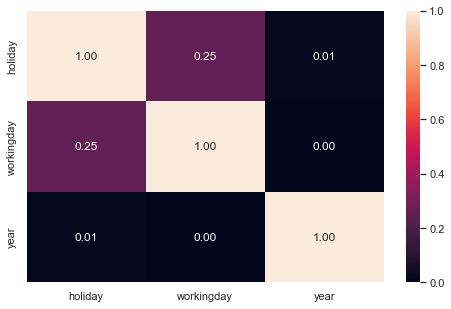

In [49]:
# correlation of features
plt.figure(figsize=(8, 5))
sns.heatmap(train[bin_cols].corr().abs(),
            vmin=0,
            vmax=1,
            annot=True,
            fmt=".2f")

## Feature engineering

In [50]:
#data['hour'].value_counts()
#data = pd.DataFrame({'hour':range(1, 25)})

b = [0, 4, 8, 12, 16, 20, 24]
lab = ['Late Night', 'Early Morning', 'Morning', 'Noon', 'Eve', 'Night']
train['day_range'] = pd.cut(train['hour'],
                            bins=b,
                            labels=lab,
                            include_lowest=True)

In [51]:
#data['day_range'] = data['day_range'].astype('category').cat.codes
train = pd.get_dummies(train, columns=['day_range'])

In [52]:
train = pd.get_dummies(train, columns=['season'])

In [53]:
train['year'] = train['year'].astype('category').cat.codes

In [54]:
scaler = StandardScaler()
new_num_cols = ['temp', 'humidity', 'windspeed']

In [55]:
scaler = StandardScaler()
new_num_cols = ['temp', 'humidity', 'windspeed']
x_num = StandardScaler().fit_transform(train[new_num_cols].values)
x_num = pd.DataFrame(x_num, columns=['temp_sc', 'humidity_sc', 'windspeed_sc'])
x_num.head()

,temp_sc,humidity_sc,windspeed_sc
0,-1.333661,0.993213,-1.567699
1,-1.438907,0.941249,-1.567699
2,-1.438907,0.941249,-1.567699
3,-1.333661,0.681430,-1.567699
4,-1.333661,0.681430,-1.567699


In [56]:
train = pd.concat([train, x_num], axis=1)

In [57]:
train.head()

,datetime,holiday,workingday,weather,temp,humidity,windspeed,count,year,month,day,hour,dayofweek,day_range_Late Night,day_range_Early Morning,day_range_Morning,day_range_Noon,day_range_Eve,day_range_Night,season_1,season_2,season_3,season_4,temp_sc,humidity_sc,windspeed_sc
0,2011-01-01 00:00:00,0,0,1,9.84,81,0.0,16,0,1,1,0,5,1,0,0,0,0,0,1,0,0,0,-1.333661,0.993213,-1.567699
1,2011-01-01 01:00:00,0,0,1,9.02,80,0.0,40,0,1,1,1,5,1,0,0,0,0,0,1,0,0,0,-1.438907,0.941249,-1.567699
2,2011-01-01 02:00:00,0,0,1,9.02,80,0.0,32,0,1,1,2,5,1,0,0,0,0,0,1,0,0,0,-1.438907,0.941249,-1.567699
3,2011-01-01 03:00:00,0,0,1,9.84,75,0.0,13,0,1,1,3,5,1,0,0,0,0,0,1,0,0,0,-1.333661,0.681430,-1.567699
4,2011-01-01 04:00:00,0,0,1,9.84,75,0.0,1,0,1,1,4,5,1,0,0,0,0,0,1,0,0,0,-1.333661,0.681430,-1.567699


In [58]:
print('Final train dataset shape:', train.shape)

Final train dataset shape: (10886, 26)


In [59]:
train.set_index('datetime', inplace=True)

## LR_1

In [60]:
X = train.drop(['count'], axis=1)
y = train['count']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 24), (3266, 24), (7620,), (3266,))

In [62]:
model_LR = LinearRegression().fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
y_pred
print(
    model_LR.score(X_train, y_train).round(2),
    model_LR.score(X_test, y_test).round(2))

0.55 0.54


In [63]:
# Root Mean Squared Log Error
def rmsle(y, ypred):
    log_y = np.log1p(y)
    log_ypred = np.log1p(ypred)
    squared_error = (log_y - log_ypred)**2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle


def evaluate_regr(y, ypred):
    rmsle_val = rmsle(y, ypred)
    print('RMSLE: {0:.3f}'.format(rmsle_val))

In [64]:
evaluate_regr(y_test, y_pred)

RMSLE: 1.009


In [65]:
y_train_log = np.log(y_train)

In [66]:
model_LR = LinearRegression().fit(X_train, y_train_log)
# logarithm prediction
y_pred_log = model_LR.predict(X_test)
# exponent prediction
ypred = np.exp(y_pred_log)
ypred
print(
    model_LR.score(X_train, y_train_log).round(2),
    model_LR.score(X_test, y_test).round(2))

0.68 -1.07


In [67]:
print(f'm.coef_ = {model_LR.coef_}, m.intercept_ = {model_LR.intercept_}')

m.coef_ = [ 7.71820752e-02  3.67957625e-02 -1.34472320e-01  4.19083819e-02
 -6.01073019e-03 -3.74288284e-03  4.67429925e-01  5.84781916e-02
  3.80967682e-03 -5.76176512e-02  3.73020677e-02 -2.55160674e+00
 -5.28138927e-01  4.17581353e-01  7.13239501e-01  1.31574824e+00
  6.33176579e-01 -1.88641923e-02  1.20656692e-01 -1.48079260e-01
  4.62867601e-02  5.37891595e-03 -3.12340654e-04 -4.58447362e-04], m.intercept_ = 4.30974549660243


In [68]:
#mean_squared_log_error(y_test, y_pred_log)

In [69]:
evaluate_regr(y_test, ypred)

RMSLE: 0.806


In [70]:
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.3f' % r2_score(y_test, ypred))
# The mean squared error
print('Mean squared error: %.3f' % mean_squared_error(y_test, ypred))
# The mean absolute error
print('Mean absolute error: %.3f' % mean_absolute_error(y_test, ypred))

Coefficient of determination: 0.529
Mean squared error: 15333.386
Mean absolute error: 77.631


### Cross validation

In [71]:
acc_lr = cross_val_score(model_LR, X_train, y_train, \
                      cv=5, scoring='neg_mean_squared_error')
acc_lr

array([-14507.10400779, -14973.98380088, -14852.15382793, -15231.81814071,
       -14314.7529296 ])

In [72]:
results = cross_val_score(model_LR, X_train, y_train, cv=5)
results.mean().round(2)

0.55

In [73]:
results.std()

0.00458471865578833

In [74]:
predict = cross_val_predict(model_LR, X_train, y_train, cv=3)
predict

array([217.59318204, 106.32468275,  34.71939933, ..., 202.20853369,
       144.27421295, 216.86131009])

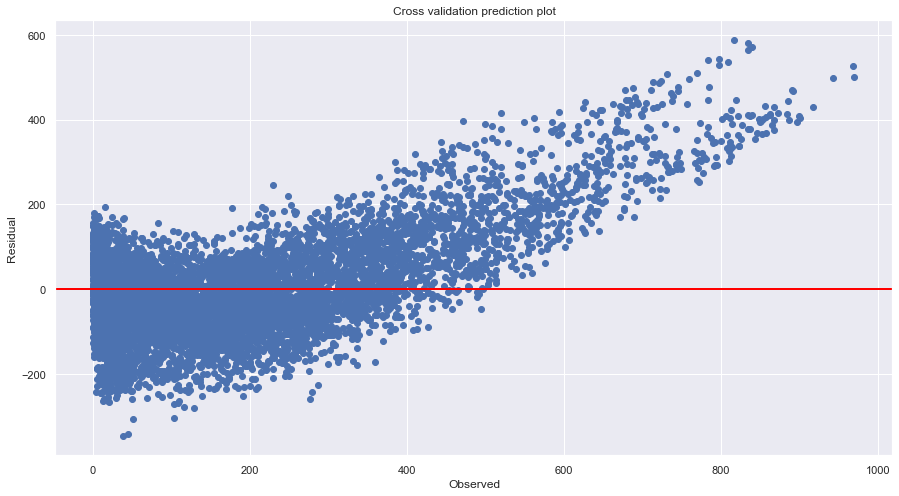

In [75]:
# cross validation plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(y_train, y_train - predict)
ax.axhline(lw=2, color='red')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

## LR_2

In [76]:
X = train[[
    'workingday', 'weather', 'temp', 'humidity', 'windspeed', 'year', 'month',
    'day', 'hour', 'dayofweek', 'day_range_Late Night',
    'day_range_Early Morning', 'day_range_Morning', 'day_range_Noon',
    'day_range_Eve', 'day_range_Night', 'season_1', 'season_2', 'season_3',
    'season_4', 'temp_sc', 'humidity_sc', 'windspeed_sc'
]]
y = train['count']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 23), (3266, 23), (7620,), (3266,))

In [78]:
model_LR2 = LinearRegression().fit(X_train, y_train)
y_pred = model_LR2.predict(X_test)
print(
    model_LR2.score(X_train, y_train).round(2),
    model_LR2.score(X_test, y_test).round(2))

0.55 0.54


In [79]:
y_train_log = np.log(y_train)

In [80]:
model_LR2 = LinearRegression().fit(X_train, y_train_log)
# logarithm prediction
y_pred_log = model_LR2.predict(X_test)
# exponent prediction
ypred_lr = np.exp(y_pred_log)
ypred_lr

array([229.7528877 ,  41.10458288, 254.25910413, ..., 148.76950749,
       168.66765912,   3.08133894])

In [81]:
model_LR2.score(X_train, y_train_log).round(2)

0.68

In [82]:
evaluate_regr(y_test, ypred_lr)

RMSLE: 0.807


### Cross validation

In [83]:
acc_lr = cross_val_score(model_LR2, X_train, y_train_log, \
                      cv=10, scoring='neg_mean_squared_error')
acc_lr

array([-0.76748685, -0.71396296, -0.73596859, -0.70761459, -0.68956636,
       -0.66861554, -0.7014431 , -0.69465801, -0.67760568, -0.83900703])

In [84]:
results = cross_val_score(model_LR2, X_train, y_train_log, cv=10)
results.mean()

0.6756402440551237

In [85]:
lr2_pred = model_LR2.predict(X_test)
lr2_pred

array([5.43700433, 3.71611962, 5.53835384, ..., 5.00239818, 5.12793026,
       1.12536422])

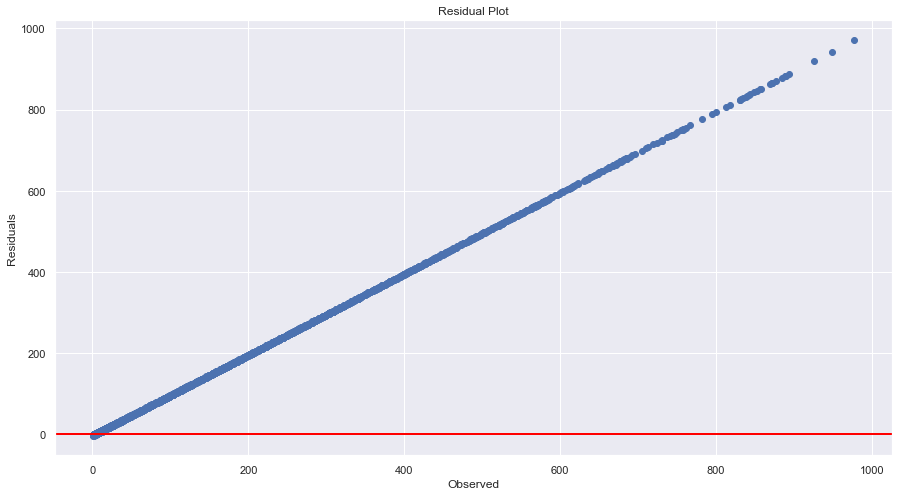

In [86]:
# residual plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(y_test, y_test - lr2_pred)
ax.axhline(lw=2, color='red')
ax.set_xlabel('Observed')
ax.set_ylabel('Residuals')
ax.title.set_text("Residual Plot")
plt.show()

## Polynomial features

In [87]:
from sklearn import preprocessing

X = train[['windspeed']]
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

poly = preprocessing.PolynomialFeatures(degree=2,include_bias=False)
poly_features = poly.fit_transform(X)

feature_names = poly.get_feature_names_out()


X = pd.DataFrame(poly_features, columns=feature_names)

In [88]:
X = pd.DataFrame(poly_features, columns=feature_names)
y = train['count']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [89]:
y_train_log = np.log(y_train)

model_LR3 = LinearRegression().fit(X_train, y_train)
# logarithm prediction
y_pred_log = model_LR3.predict(X_test)
# exponent prediction
ypred_lr_p = np.exp(y_pred_log)
ypred_lr_p

array([5.76595694e+64, 1.26344926e+76, 7.62254262e+85, ...,
       7.62254262e+85, 7.62254262e+85, 5.60012683e+80])

In [90]:
lr3_pred = model_LR3.predict(X_test)
lr3_pred

array([149.11741708, 175.23031256, 197.7508429 , ..., 197.7508429 ,
       197.7508429 , 185.92959669])

In [91]:
print(
    model_LR3.score(X_train, y_train).round(2),
    model_LR3.score(X_test, y_test).round(2))

0.01 0.02


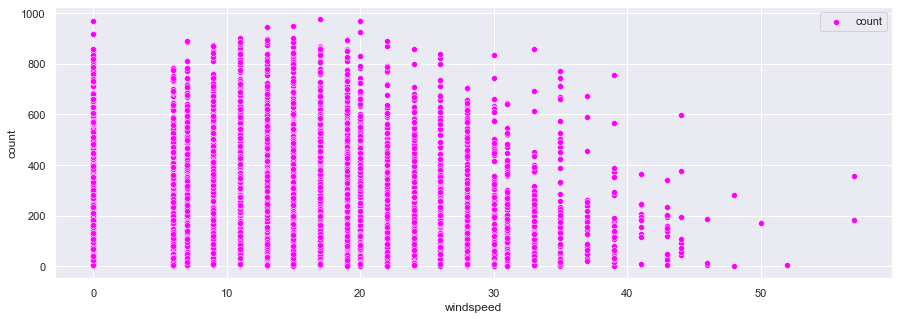

In [92]:
sns.scatterplot(data=train, x="windspeed", y="count", color="magenta", label="count");

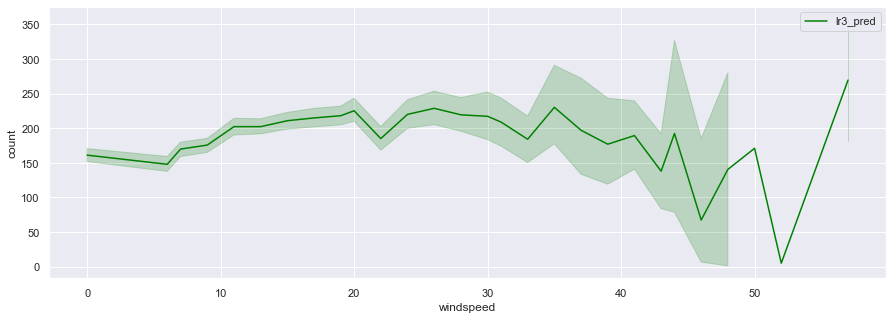

In [93]:
sns.lineplot(data=train, x="windspeed", y="count", color="green", label="lr3_pred");

## LR_4

In [94]:
X = train[[
    'workingday', 'year', 'month', 'hour', 'dayofweek', 'day_range_Late Night',
    'day_range_Early Morning', 'day_range_Morning', 'day_range_Noon',
    'day_range_Eve', 'day_range_Night', 'season_1', 'season_2', 'season_3',
    'season_4', 'temp_sc', 'humidity_sc', 'windspeed_sc'
]]
y = train['count']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 18), (3266, 18), (7620,), (3266,))

In [96]:
model_LR4 = LinearRegression().fit(X_train, y_train)
y_pred = model_LR4.predict(X_test)
print(
    model_LR4.score(X_train, y_train).round(2),
    model_LR4.score(X_test, y_test).round(2))

0.55 0.54


In [97]:
y_train_log = np.log(y_train)

model_log_LR4 = LinearRegression().fit(X_train, y_train_log)
# logarithm prediction
y_pred_log = model_log_LR4.predict(X_test)
# exponent prediction
ypred_lr_4 = np.exp(y_pred_log)
model_log_LR4.score(X_train, y_train_log).round(2)

0.68

In [98]:
evaluate_regr(y_test, ypred_lr_4)

RMSLE: 0.812


## LR_5

In [99]:
#scaler = MinMaxScaler()
#mm_num_cols = ['temp', 'humidity', 'windspeed']
#sc_num = StandardScaler().fit_transform(train[mm_num_cols].values)
#sc_num = pd.DataFrame(x_num, columns=['temp_scm', 'humidity_scm', 'windspeed_scm'])
#sc_num.head()
#train = pd.concat([train, sc_num], axis=1)

In [100]:
#train = pd.get_dummies(train, columns=['weather'])

In [101]:
#X = train[[
    #'holiday', 'workingday', 'year', 'month', 'hour', 'dayofweek',
    #'day_range_Late Night', 'day_range_Early Morning', 'day_range_Morning',
    #'day_range_Noon', 'day_range_Eve', 'day_range_Night', 'temp_scm',
    #'humidity_scm', 'windspeed_scm', 'weather_1.0', 'weather_2.0',
    #'weather_3.0', 'weather_4.0'
#]]
#y = train['count']

In [102]:
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
#X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [103]:
##model_LR5 = LinearRegression().fit(X_train, y_train)
#y_pred = model_LR5.predict(X_test)
#print(
    #model_LR5.score(X_train, y_train).round(2),
    #model_LR5.score(X_test, y_test).round(2))

In [104]:
#y_train_log = np.log(y_train)

#model_log_LR5 = LinearRegression().fit(X_train, y_train_log)
# logarithm prediction
#y_pred_log = model_log_LR4.predict(X_test)
# exponent prediction
#ypred_lr_5 = np.exp(y_pred_log)
#model_log_LR5.score(X_train, y_train_log).round(2)

## Hyperparameters

In [105]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [106]:
hyperparams = {
    'max_depth': [2, 3, 5, 10], 
    'n_estimators': [5, 50, 100],
    'min_samples_leaf': [1, 10, 20]
}

In [107]:
rf_opti = RandomForestClassifier()
lr = Ridge()

In [108]:
g = GridSearchCV(rf_opti, hyperparams, cv=5, scoring='accuracy')
g.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [1, 10, 20],
                         'n_estimators': [5, 50, 100]},
             scoring='accuracy')

In [109]:
g.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}

In [110]:
cv_df = pd.DataFrame(g.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.021706,0.004622,0.039181,0.005504,2,1,5,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.017717,0.017060,0.018373,0.020997,0.023622,0.019554,0.002434,36
1,0.148437,0.001007,0.289376,0.004880,2,1,50,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.022310,0.024934,0.019685,0.020341,0.022966,0.022047,0.001884,26
2,0.297855,0.012121,0.576710,0.020412,2,1,100,"{'max_depth': 2, 'min_samples_leaf': 1, 'n_est...",0.019029,0.021654,0.024934,0.023622,0.021654,0.022178,0.002007,25
3,0.019316,0.000351,0.036628,0.003372,2,10,5,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.020997,0.022310,0.016404,0.024934,0.024934,0.021916,0.003150,28
4,0.145744,0.002364,0.286141,0.002513,2,10,50,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.013780,0.020997,0.019685,0.023622,0.021654,0.019948,0.003336,34
5,0.374551,0.067974,0.645733,0.087526,2,10,100,"{'max_depth': 2, 'min_samples_leaf': 10, 'n_es...",0.019029,0.020997,0.023622,0.021654,0.024278,0.021916,0.001884,27
6,0.031475,0.010611,0.051241,0.008558,2,20,5,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es...",0.019685,0.019685,0.019029,0.020341,0.019685,0.019685,0.000415,35
7,0.187563,0.027954,0.333609,0.032705,2,20,50,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es...",0.022966,0.017717,0.019029,0.023622,0.020341,0.020735,0.002258,31
8,0.294512,0.012332,0.581330,0.021810,2,20,100,"{'max_depth': 2, 'min_samples_leaf': 20, 'n_es...",0.020341,0.022310,0.022310,0.018373,0.020997,0.020866,0.001461,30
9,0.021444,0.000179,0.040793,0.001201,3,1,5,"{'max_depth': 3, 'min_samples_leaf': 1, 'n_est...",0.019685,0.019685,0.020341,0.026903,0.026247,0.022572,0.003283,23


In [111]:
rf_best = g.best_estimator_

In [112]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10)

In [113]:
rf_best.predict(X_test)

array([165,   5, 157, ..., 129, 130,   1])

In [114]:
f'Grid search training score: {rf_best.score(X_train, y_train)}   Grid search testing score {rf_best.score(X_test, y_test)}'

'Grid search training score: 0.6098425196850393   Grid search testing score 0.027250459277403553'

## RandomForest

In [115]:
X = train[[
    'workingday', 'year', 'month', 'hour', 'dayofweek', 'day_range_Late Night',
    'day_range_Early Morning', 'day_range_Morning', 'day_range_Noon',
    'day_range_Eve', 'day_range_Night', 'season_1', 'season_2', 'season_3',
    'season_4', 'temp_sc', 'humidity_sc'
]]
y = train['count']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 17), (3266, 17), (7620,), (3266,))

In [117]:
model_rf = RandomForestRegressor(n_estimators=200)

In [118]:
model_rf.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [119]:
print(
    model_rf.score(X_train, y_train).round(2),
    model_rf.score(X_test, y_test).round(2))

0.99 0.95


In [120]:
r2_scores = cross_val_score(model_rf, X_train, y_train, cv=3)
np.average(r2_scores)

0.9345377333006075

In [121]:
model_rf_pred = model_rf.predict(X_test)
model_rf_pred

array([130.25 ,  13.165, 148.9  , ..., 208.   , 193.2  ,   2.13 ])

In [122]:
evaluate_regr(y_test, model_rf_pred)

RMSLE: 0.338


In [123]:
predict_rf = cross_val_predict(model_rf, X_train, y_train, cv=3)
predict_rf

array([161.215,  88.335,   4.635, ..., 225.425,  42.27 , 412.015])

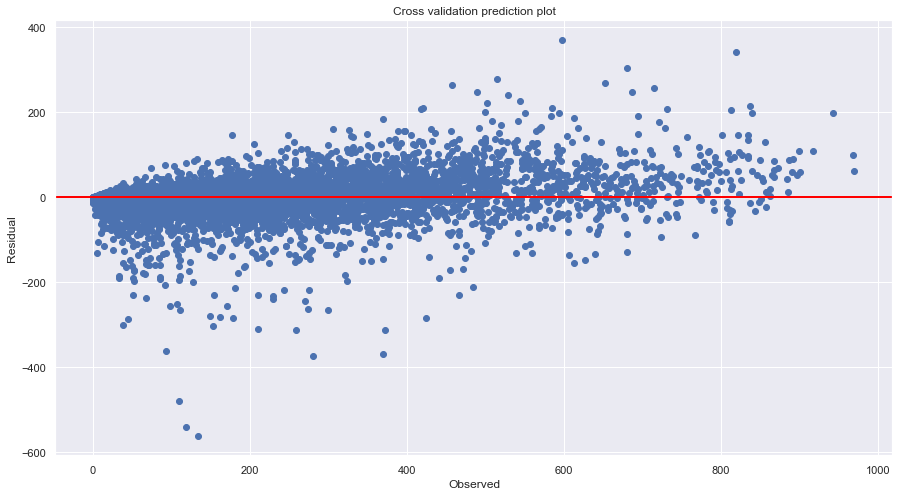

In [124]:
# cross validation prediction plot
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(y_train, y_train - predict_rf)
ax.axhline(lw=2, color='red')
ax.set_title('Cross validation prediction plot')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

## Stochastic Gradient Descent

In [125]:
model_sgdr = SGDRegressor()

In [126]:
model_sgdr.fit(X_train, y_train)
print(
    model_sgdr.score(X_train, y_train).round(2),
    model_sgdr.score(X_test, y_test).round(2))

0.55 0.53


## Regularization

In [127]:
X = train[[
    'workingday', 'year', 'month', 'hour', 'dayofweek', 'day_range_Late Night',
    'day_range_Early Morning', 'day_range_Morning', 'day_range_Noon',
    'day_range_Eve', 'day_range_Night', 'season_1', 'season_2', 'season_3',
    'season_4', 'temp_sc', 'humidity_sc'
]]
y = train['count']

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7620, 17), (3266, 17), (7620,), (3266,))

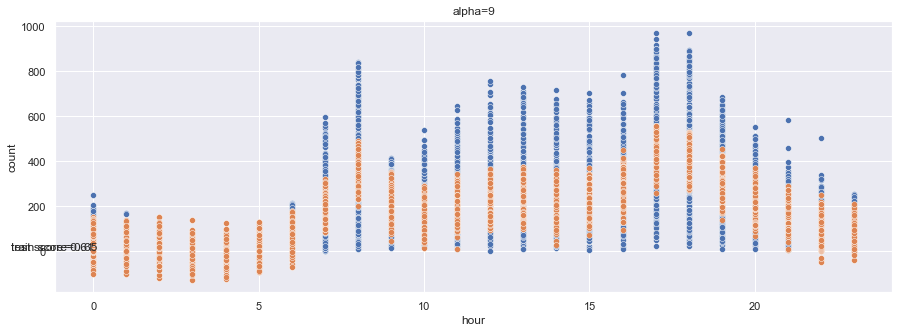

In [129]:
alphas = range(-10, 10, 1)
for alpha in alphas:
    # create ridge model
    model = make_pipeline(KBinsDiscretizer(n_bins=30), Ridge(alpha=alpha))

    # fit the model
    model.fit(X_train, y_train)

    # calculate the scores
    train_score = model.score(X_train, y_train).round(2)
    test_score = model.score(X_test, y_test).round(2)

    # calculate test and train predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # make scatter
    ax = sns.scatterplot(x=X_train['hour'], y=y_train)
    ax.set(title=f"alpha={alpha}")
    sns.scatterplot(x=X_test['hour'], y=y_pred_test)

    plt.text(-2.5, 6, f"train score={train_score}")
    plt.text(-2.5, 5, f"test score={test_score}")

    # display properties
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.2)
    plt.close()

In [130]:
print(train_score, test_score)

0.65 0.61


In [131]:
model_ridge = RidgeCV(alphas=(0.5, 1.0, 10.0), scoring='r2', cv=10)

In [132]:
model_ridge.fit(X_train, y_train)
print(
    model_ridge.score(X_train, y_train).round(2),
    model_ridge.score(X_test, y_test).round(2))

0.55 0.54


In [133]:
model_lasso = LassoCV(n_alphas=50, cv=10)

In [134]:
model_lasso.fit(X_train, y_train)
print(
    model_lasso.score(X_train, y_train).round(2),
    model_lasso.score(X_test, y_test).round(2))

0.55 0.54


## Submission

In [135]:
model_rf_pred = model_rf.predict(X_test).astype("int")
submission = pd.DataFrame({'datetime': X_test.index, 'count': model_rf_pred})
submission.to_csv('submission_bike.csv', index=False)